<a href="https://colab.research.google.com/github/Avigail-Spira/CS-381/blob/main/A_Spira_Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Avigail-Spira/CS-381/main/diamonds.csv")


##Part 1: Data Summary
#####This data set hold the attributes of roughly 54,000 diamonds.
#####There are 10 attributes listed:
1.  **Carat** is the unit of measurement used to weigh precious gems including diamonds. Carat values range from 0.2-5.01 in this data set.
2. **Cut** - how a diamond is cut influences the look and sparkle of it because it determines how much light the diamond reflects. The many facets of the diamond is what is referred to by "cut". Cut is categorized by Fair, Good, Very Good, Premium, or Ideal (in ascending order)
3. **Color** - When it comes to the color of a diamond, the less color the higher the quality of the stone. Colors range from J which is the lowest quality, to D which is the highest quality. The color D is considered colorless while J would be a more yellowish color. The color of a diamond is evaluated before it is placed in the setting so the metal of the setting will not influence its color. Color is determined by comparing the diamond to a stone of the "master set". 
4. **Clarity** - is the measure of how clear the diamond is. It is a measure of how pure the diamond is taking into consideration any blemishes it may have. The more pure a stone is, the clearer it becomes. Clarity is seen by magnifying the stone 10x its size. The best score of clarity is IF which is a practically flawless diamond. On the opposite side of the spectrum is l1. And in between there are clarity scores of SI2, SI1, VS2, VS1, VVS2, VVS1.
5. **Depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79). Depth is the length from the top to the bottom of the diamond. It is calculated by dividing the diamond's height by width. The depth of a diamond has an effect on the appearance and sparkle of a diamond because proportions of a diamond effect how it reflects light. Ideal depth is between 62.9 and 59.5 percent.
6. **Table** - the flat facet on the surface of a diamond. It contributes to the brilliance of the stone. A larger table allows more light into the stone which will be reflected on all the internal facets and could give the stone a more shiny and sparkly look. The more light the table lets into the diamond, the higher grade it will score in terms of its table. 
7. **Price** - price of the diamond in US dollars. In this data set the diamonds range in price from \$326 to \$18,823
8. **X** - length in mm (0--10.74)
9. **Y** - width in mm (0--58.9)
10. **Z** - depth in mm (0--31.8)



##Part 2:Exploratory Data Analysis (EDA)

In [ ]:
#Check for value of nulls in the data set
nulls = df.isnull().sum()
print(nulls)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


There are no null values in the data set so there are no values which we need to fill in.

###Price:

In [26]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

The average price of the diamonds in the dataset is $ 3932.799721913237
Prices for diamonds range from $ 326 to $ 18823


<function matplotlib.pyplot.show>

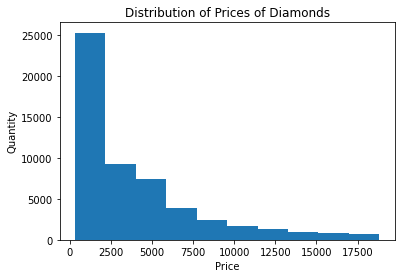

In [15]:
print(f"The average price of the diamonds in the dataset is $", df['price'].mean())
print("Prices for diamonds range from $", df.min(axis=0)['price'], "to $", df.max(axis=0)['price'])

plt.hist(df['price'])
plt.title("Distribution of Prices of Diamonds")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show

The large majority of the diamonds are in price range of \$0-$2500 and as the price increases, the quantity of diamonds decreases

#####How is price of diamond influenced by other attributes

Text(0, 0.5, 'Price')

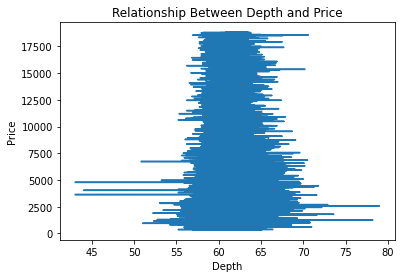

In [19]:
plt.plot(df['depth'], df['price'])
plt.title('Relationship Between Depth and Price')
plt.xlabel("Depth")
plt.ylabel("Price")

There is no clear influence of depth on price but we do see the depth clustered around the ideal depth of approximately 60-63. There are some outliers with extremely high or low depths and the prices of these outliers varies.

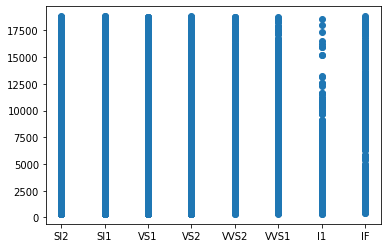

In [21]:
plt.scatter(df['clarity'], df['price'])

Seems to be no effect of the clarity of the stone on the price of it. The only inconsistent clarity is l1 which has gaps in prices but this can just be random.

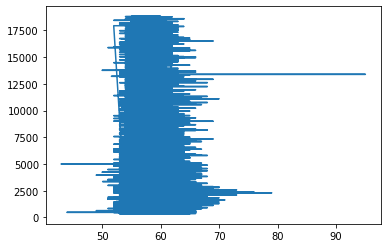

In [ ]:
plt.plot(df['table'], df['price'])

Text(0.5, 1.0, 'Effect of X on Price')

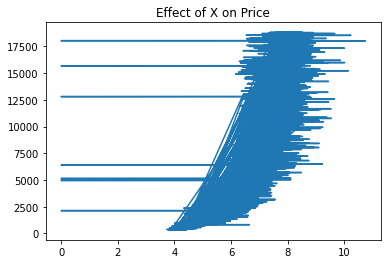

In [25]:
plt.plot(df['x'], df['price'])
plt.title('Effect of X on Price')

###Carat

In [42]:
df['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Text(0, 0.5, 'Quantity')

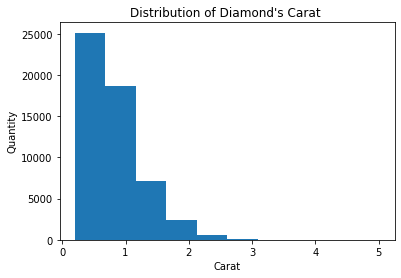

In [27]:
plt.hist(df['carat'])
plt.title("Distribution of Diamond's Carat ")
plt.xlabel("Carat")
plt.ylabel("Quantity")

There is a larger quantity of diamonds with a smaller carat weight. Similarly we saw that there was a larger quantity of diamonds at a lower price range. This could show correlation between carat and price of a diamond. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Boxplot of Carat Data')]

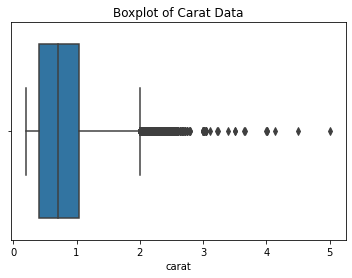

In [29]:
sns.boxplot(df['carat']).set(title='Boxplot of Carat Data')

Text(0.5, 1.0, 'Relationship between z and carat')

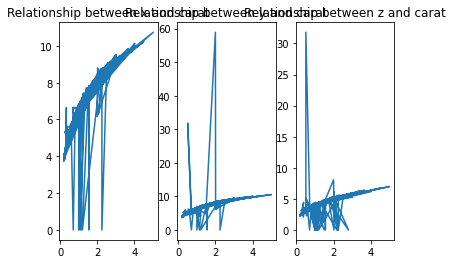

In [32]:
#Scatter plot comparing carat to x,y, and z
plt.subplot(131)
plt.plot(df['carat'], df['x'])
plt.title('Relationship between x and carat')

plt.subplot(132)
plt.plot(df['carat'], df['y'])
plt.title('Relationship between y and carat')


plt.subplot(133)
plt.plot(df['carat'], df['z'])
plt.title('Relationship between z and carat')



###Cut

In [43]:
df['cut'].describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

Text(0.5, 1.0, 'Distribution of Cut')

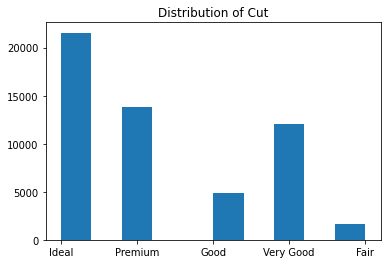

In [ ]:
plt.hist(df['cut'])
plt.title('Distribution of Cut')

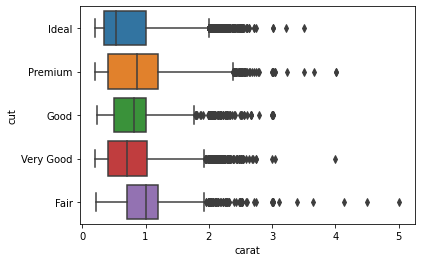

In [38]:
sns.boxplot(x=df['carat'], y=df['cut'], data=df['cut'], orient='h')

###Clarity

In [44]:
df['clarity'].describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

Text(0.5, 1.0, 'Distribution of Clarity')

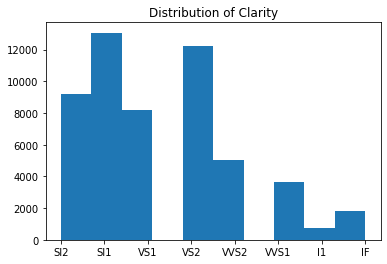

In [35]:
plt.hist(df['clarity'])
plt.title('Distribution of Clarity')

###Depth and Table

In [46]:
print(df['depth'].describe())
print()
print(df['table'].describe())

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64


Text(0, 0.5, 'Table')

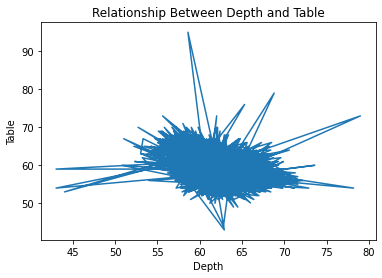

In [47]:
plt.plot(df['depth'], df['table'])
plt.title('Relationship Between Depth and Table')
plt.xlabel("Depth")
plt.ylabel("Table")

##Part 3: Inferences

1. What proportion of diamonds are between .30 and 1.08 carats?

In [ ]:
#Go through every carat value and increment the total if it falls between the given range
total = 0
for i in df['carat']:
  if i > .30 and i < 1.08:
    total += 1
print(total)

37434


2. How many of the diamonds have equal x and y dimensions?

In [ ]:
#Take the sum of rows that have equal x and y values
(df["x"] == df["y"]).sum()

17

3. How many of the diamonds have a carat value that is less than the mean carat value?

In [ ]:
#First find the mean carat value
mean = df['carat'].mean()

#increment each time the carat value is below the mean carat value
total = 0
for i in df['carat']:
  if i > mean:
    total += 1
print(total)

22813


4. How many diamonds have a Premium cut or better?

In [ ]:
#increment the total if the cut is premium or ideal
total = 0
for i in df['cut']:
  if i == 'Premium' or i == 'Ideal':
    total += 1
print(total)

35342


5. Which diamond has the highest price per carat? What is its value?

In [ ]:
pricePerCarats = [(id, pricePerCarat) for id, pricePerCarat in zip(df["Unnamed: 0"], df["price"] / df["carat"])]
print(max(pricePerCarats, key=lambda item:item[1]))

(27636, 17828.846153846152)


6. Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


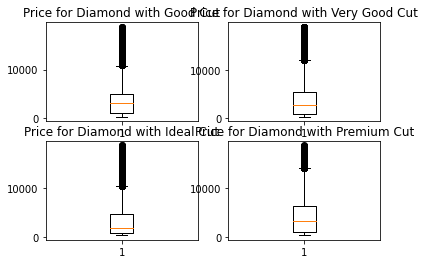

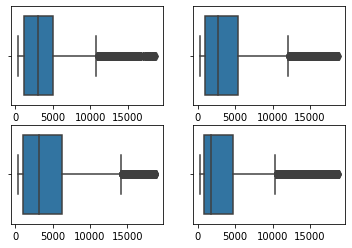

In [11]:
plt.figure(1)

plt.subplot(221)
good = list(df[df['cut'] == 'Good']['price'])
plt.boxplot(good)
plt.title('Price for Diamond with Good Cut')

plt.subplot(222)
vgood = list(df[df['cut'] == 'Very Good']['price'])
plt.boxplot(vgood)
plt.title('Price for Diamond with Very Good Cut')

plt.subplot(223)
ideal = list(df[df['cut'] == 'Ideal']['price'])
plt.boxplot(ideal)
plt.title('Price for Diamond with Ideal Cut')

plt.subplot(224)
premium = list(df[df['cut'] == 'Premium']['price'])
plt.boxplot(premium)
plt.title('Price for Diamond with Premium Cut')

plt.show

plt.figure(2)

plt.subplot(221)
print(sns.boxplot(good, orient='v'))
plt.subplot(222)
print(sns.boxplot(vgood, orient='v'))
plt.subplot(223)
print(sns.boxplot(premium, orient='v'))
plt.subplot(224)
print(sns.boxplot(ideal, orient='v'))

7. Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?


Text(0.5, 1.0, 'Carat vs. Price')

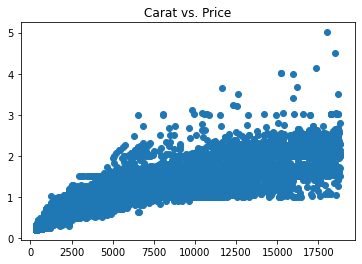

In [12]:
plt.scatter(df['price'], df['carat'])
plt.title('Carat vs. Price')

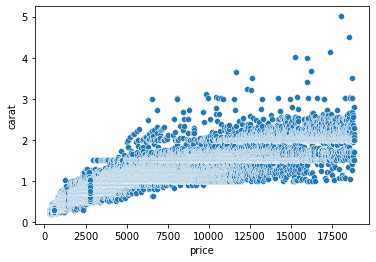

In [ ]:
sns.scatterplot(x=df['price'], y=df['carat'])

For the higher carats the price is at the highest end of the spectrum. But for lower carats the prices vary.

##Part 4: Conclusion

From the charts we see that more of the data tends to cluster at the lower values- there are more diamonds with lower carat, lower price, and with similar depths. I did not see such a clear correlation between all of the attributes and price as I would have expected from my knowledge of the domain.

##Part 5: References
https://en.wikipedia.org/wiki/Diamond
https://www.americangemsociety.org/understanding-diamond-color-the-4cs-of-diamonds/

https://ggplot2.tidyverse.org/reference/diamonds.html

https://www.diamonds.pro/education/diamond-depth-and-table/

https://www.brilliance.com/diamonds/ideal-depth-table-round-cut-diamonds